### Spam Email Classification Model

#### Goal: 
Creating a binary classifier that can distinguish between spam (junk) emails from ham (non-spam) emails as a final project for UC Berkeley's Data 100 - Data Science Techniques & Principles Course.

Includes:
* Feature engineernig with text data
* `sklearn` library to process & fit models ~ logistic regression
* Validating the performance of the model & minimizing overfitting

<center>
<img alt="word proportions" src="propclass.png" width="600px;" />
</center>

#### The Data: 
The dataset is from [SpamAssassin](https://spamassassin.apache.org/old/publiccorpus/). It consists of email messages and their labels (0 for ham, 1 for spam). Your labeled training dataset contains 8,348 labeled examples, and the unlabeled test set contains 1,000 unlabeled examples.
**Note:** The dataset is from 2004, so the contents of emails might be very different from those in 2023.


The `train` DataFrame consists of labeled data & contains four columns:
1. `id`: An identifier for the training example.
2. `subject`: The subject of the email.
3. `email`: The text of the email.
4. `spam`: 1 if the email is spam, 0 if the email is ham (not spam).
   
The `test` DataFrame contains 1,000 unlabeled emails.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#os.getcwd()
new_path = '/Users/sarasharifzadeh/anaconda3/APROJECTS/projectfiles'
os.chdir(new_path)

In [3]:
train_df = pd.read_csv("train.csv") #contains spam label 
test_df = pd.read_csv("test.csv")   # does not contain spam label

display(test_df)
display(train_df)

,id,subject,email
0,0,Subject: CERT Advisory CA-2002-21 Vulnerabilit...,\n \n -----BEGIN PGP SIGNED MESSAGE-----\n \n ...
1,1,Subject: ADV: Affordable Life Insurance ddbfk\n,Low-Cost Term-Life Insurance!\n SAVE up to 70%...
2,2,Subject: CAREER OPPORTUNITY. WORK FROM HOME\n,------=_NextPart_000_00A0_03E30A1A.B1804B54\n ...
3,3,Subject: Marriage makes both sexes happy\n,"URL: http://www.newsisfree.com/click/-3,848315..."
4,4,Subject: Re: [SAtalk] SA very slow (hangs?) on...,On Thursday 29 August 2002 16:39 CET Mike Burg...
...,...,...,...
995,995,Subject: Re: Alsa/Redhat 8 compatability\n,"Once upon a time, Brian wrote :\n \n > \n > ..."
996,996,Subject: Re: Goodbye Global Warming\n,\n --]> A Green once said that if the Spotted ...
997,997,Subject: Re: Entrepreneurs\n,"On Fri, 23 Aug 2002, Robert Harley wrote:\n \n..."
998,998,Subject: Re: [ILUG] slashdot EW Dijkstra humor\n,JPL suggested:\n > Recursion is only truely u...


,id,subject,email,spam
0,0,Subject: A&L Daily to be auctioned in bankrupt...,URL: http://boingboing.net/#85534171\n Date: N...,0
1,1,"Subject: Wired: ""Stronger ties between ISPs an...",URL: http://scriptingnews.userland.com/backiss...,0
2,2,Subject: It's just too small ...,<HTML>\n <HEAD>\n </HEAD>\n <BODY>\n <FONT SIZ...,1
3,3,Subject: liberal defnitions\n,Depends on how much over spending vs. how much...,0
4,4,Subject: RE: [ILUG] Newbie seeks advice - Suse...,hehe sorry but if you hit caps lock twice the ...,0
...,...,...,...,...
8343,8343,Subject: Re: ALSA (almost) made easy\n,"Thanks for this, I'm going to give them anothe...",0
8344,8344,Subject: Re: Goodbye Global Warming\n,Thanks for the link - I'm fascinated by archae...,0
8345,8345,Subject: hello\n,WE NEED HELP. We are a 14 year old fortune 50...,1
8346,8346,Subject: Your application is below. Expires Ju...,<html>\n \n \n <HEAD> \n <META charset=3DUTF-8...,1


#### Why Logistic Regression here?

Logistic Regression if a model problem in classification which involves predicting a categorical variable: such as is it spam or not - yes or no. A classification model aims to categorize data (binary or multiclass). In **binary classification** data must belong to one of two groups, it can be extended to more in the multi-class case. 


#### Inuition: Coin Flip
In observing the outcomes of a coin flip (1=Heads, 0=Tails). If we had 10 flips = [0,0,1,1,1,1,0,0,0,0] for the next flip would you predict Heads or Tails? In a reasonable model we assume all flips are iid - independent & identically distributed. As in, each flip has the same probability of returning a Heads. 

If we define a parameter theta, the probability the next flip is Heads, we use this parameter theta to inform our decision for yhat, or our 0-1 prediction of the next flip. 


\begin{equation}
\hat y = \begin{cases*}
  1, & if $\theta \ge 0.5$,\\
  0, & otherwise \\
\end{cases*}
\end{equation}

Deriving the Logistic Model - probabilistic classifier for baseline 

\begin{equation}
classify(X) = \begin{cases*}
  1, & if $\mathbb P_{\theta}(Y = 1 | X) \ge 0.5$,\\
  0, & if $\mathbb P_{\theta}(Y = 1 | X)$ < 0.5 \\
\end{cases*}
\end{equation}

### EDA / Data Cleaning

In [154]:
# Fill any missing or NAN values
print('Before imputation:')
print(train_df.isnull().sum())
train_df = train_df.fillna('')
print('------------')
print('After imputation:')
print(train_df.isnull().sum())

Before imputation:
id         0
subject    0
email      0
spam       0
dtype: int64
------------
After imputation:
id         0
subject    0
email      0
spam       0
dtype: int64


### Train / Validation Split
The training data is the only data available so I use it for both training and validating the model. To do this, it needs to be split into separate training & validation sets, so that I can assess the performance of the classifier once done training. 

In [155]:
# This creates a 90/10 train-validation split on the labeled data.
from sklearn.model_selection import train_test_split
train, val = train_test_split(train_df, test_size = 0.1, random_state = 32)

# We must do this in order to preserve the ordering of emails to labels for the words_in_texts function
train = train.reset_index(drop = True)

### Feature Engineering 

In order to train a logistic regression model, we need a numeric feature matrix $\mathbb{X}$ and a vector of corresponding binary labels  $\mathbb{Y}$. In order to accomplish this, we need numeric features derived from the email test and use those features for our log-reg model. 

In [156]:
def words_in_texts(words, texts):
    '''
     Arguments
         words (list): words to find
         texts (Series): strings to search in

      Returns: 
          A 2D numpy array of 1s and 0s with shape (n, p) where n is the number of texts and p is the number of words
    '''
    #indicator_arr = 1 * np.array([texts.str.contains(word) for word in words]).T
    indicator_arr = np.array([texts.str.contains(w) for w in words]).astype(int).T
    return indicator_arr

In [157]:
print(words_in_texts(['hello', 'bye', 'world'], pd.Series(['hello', 'hello worldhello'])))
print("translation:")
print("TEXT 1 in Series - hello: yes, bye: no, world: no")
print("TEXT 2 in Series - hello: yes, bye: no, world: yes")

[[1 0 0]
 [1 0 1]]
translation:
TEXT 1 in Series - hello: yes, bye: no, world: no
TEXT 2 in Series - hello: yes, bye: no, world: yes


#### Feature Identification
I need to identify features that allow for a distinction between spam & ham emails. The idea is to compare the distribution of a single feature in spam emails to the distribution of the same feature in ham emails. If the feature itself is a binary indicator, such as whether a certain word occurs in the text, this amounts to comparing the proportion of spam emails with the word to the proportion of ham emails with the word. 

In [158]:
from IPython.display import display, Markdown
df = pd.DataFrame({
    'word_1': [1, 0, 1, 0],
    'word_2': [0, 1, 0, 1],
    'type': ['spam', 'ham', 'ham', 'ham']
})
display(Markdown("> Our Original DataFrame has a `type` column and some columns corresponding to words. You can think of each row as a sentence, and the value of 1 or 0 indicates the number of occurences of the word in this sentence."))
display(df);
display(Markdown("> `melt` will turn columns into entries in a variable column. Notice how `word_1` and `word_2` become entries in `variable`; their values are stored in the value column."))
display(df.melt("type"))

> Our Original DataFrame has a `type` column and some columns corresponding to words. You can think of each row as a sentence, and the value of 1 or 0 indicates the number of occurences of the word in this sentence.

,word_1,word_2,type
0,1,0,spam
1,0,1,ham
2,1,0,ham
3,0,1,ham


> `melt` will turn columns into entries in a variable column. Notice how `word_1` and `word_2` become entries in `variable`; their values are stored in the value column.

,type,variable,value
0,spam,word_1,1
1,ham,word_1,0
2,ham,word_1,1
3,ham,word_1,0
4,spam,word_2,0
5,ham,word_2,1
6,ham,word_2,0
7,ham,word_2,1


In [159]:
#goal: compare the proportion of spam and ham emails containing a certain word
#using a variable  calculate the proportions for each variable in each type of email

words = ["obligation", "bank", "drug", "now!", "memo"]
matches = words_in_texts(words, train["email"])
matches

d = []
for r in matches: 
    d.append(r)

d = pd.DataFrame(d)
d.columns = words
#matches of the words list in each email in the training dataset
print("Original DataFrame matching our word list to the text in each training email:")
display(d.head())

#original data - spam:1, ham:0, adding this type to our df of word matches
spam_list = train["spam"]
d["type"] = spam_list

#replace with actual types
s_dict = {1: "spam", 0: "ham"}
d = d.replace({"type": s_dict})
print("Adding the spam/ham binary class and replacing with word type:")
display(d.head())

print("Melted to unpivot the dataframe for proportion calculations:")
melted = d.melt("type")
melted.head()

Original DataFrame matching our word list to the text in each training email:


,obligation,bank,drug,now!,memo
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


Adding the spam/ham binary class and replacing with word type:


,obligation,bank,drug,now!,memo,type
0,0,0,0,0,0,ham
1,0,0,0,0,0,ham
2,0,0,0,0,0,ham
3,0,0,0,0,0,ham
4,0,0,0,0,0,ham


Melted to unpivot the dataframe for proportion calculations:


,type,variable,value
0,ham,obligation,0
1,ham,obligation,0
2,ham,obligation,0
3,ham,obligation,0
4,ham,obligation,0


In [160]:
# calculating proportions
percents = melted.groupby(["variable", "type"]).agg({"value":"value_counts"}).rename(columns={"value":"valuec"})
print("Grouping by each word, type and aggregating by count of the value:")
display(percents.head(8))
print("For example, in emails classified as ham, the word 'bank' appears in 100 of 5573 ham emails, and in emails classified as spam, 'bank' appears in 129 of 1940 spam emails.")

#calculating proportions
print("\n")
print("Calculating the proportion of each word in the sum of 7513 emails:")
#x: x/float(x.sum())
proportion = percents.groupby(level=0).apply(lambda x: x/float(x.sum())).droplevel(0)
display(proportion.head(8))

#resetting index for plotting
print("Reset Index for Plotting:")
display(proportion.reset_index().head(5))

Grouping by each word, type and aggregating by count of the value:


valuec
variable type value        
bank     ham  0        5473
              1         100
         spam 0        1811
              1         129
drug     ham  0        5521
              1          52
         spam 0        1890
              1          50

For example, in emails classified as ham, the word 'bank' appears in 100 of 5573 ham emails, and in emails classified as spam, 'bank' appears in 129 of 1940 spam emails.


Calculating the proportion of each word in the sum of 7513 emails:


valuec
variable type value          
bank     ham  0      0.728471
              1      0.013310
         spam 0      0.241049
              1      0.017170
drug     ham  0      0.734860
              1      0.006921
         spam 0      0.251564
              1      0.006655

Reset Index for Plotting:


,variable,type,value,valuec
0,bank,ham,0,0.728471
1,bank,ham,1,0.013310
2,bank,spam,0,0.241049
3,bank,spam,1,0.017170
4,drug,ham,0,0.734860


<Axes: title={'center': 'Proportion of a Word in Spam v. Ham Emails'}, xlabel='variable', ylabel='valuec'>

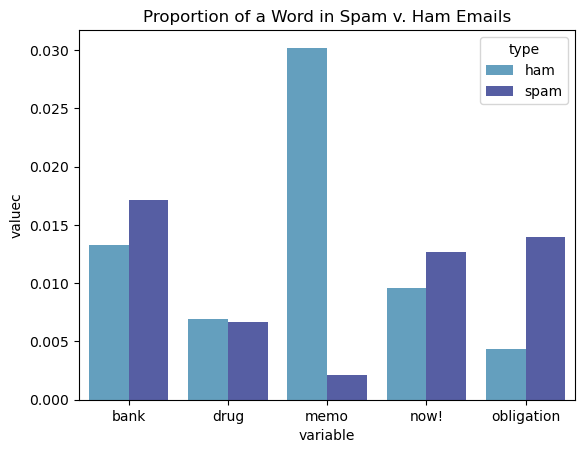

In [192]:
#proportion of how often the word (variable) shows up in each type of email
prop = proportion.reset_index()

plt.title("Proportion of a Word in Spam v. Ham Emails")
sns.set_palette("icefire")
sns.barplot(data=prop[prop["value"]==1], x="variable", y="valuec", hue="type")

#### Moving onto Classification
Since the output of `words_in_texts(words, train['email'])` is a numeric  $\mathbb{X}$ matrix, we can use it directly to train our classifier. Now using the `words` list and the `train` dataframe to create two arrays: `X_train` & `y_train`.

* `X_train:` a matrix of 0s and 1s created using `words_in_texts`

* `y_train:` a vector of the correct labels for each email in the training set.



In [162]:
print(words)
print("\n")
X_train = words_in_texts(words, train["email"])
y_train = train["spam"]

display(X_train[:5]), display(y_train[:5])

['obligation', 'bank', 'drug', 'now!', 'memo']




array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

0    0
1    0
2    0
3    0
4    0
Name: spam, dtype: int64

(None, None)

###  Basic Modeling


In [163]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model
model.fit(X_train, y_train)
model.intercept_, model.coef_

train_acc = model.score(X_train, y_train)
print("Training Accuracy: ", train_acc)

Training Accuracy:  0.7610807932916278


#### Evaluating the Classifier

Thinking about the intention and applications of our problem: identifying spam emails, and likely to **filter an inbox** so that we prevent a `spam` email from going to the inbox folder. Remember, we are classifying spam as 1 and ham as 0. There are two kinds of errors we can make:

* `False Positive (FP):` a real email gets flagged as spam and filtered out of the inbox
* `False Negative (FN):` a spam email gets mislabeled as real and ends up in the inbox

In this context, it's more important to optimize for minimizing for False Positives, because it is more "deadly" to lose a real email to the spam folder than it is to be exposed to a spam email by accident.


**Precision**: Measures the proportion $\frac{\text{TP}}{\text{TP} + \text{FP}}$ of emails flagged as spam that are actually spam.

**Recall**: Measures the proportion $\frac{\text{TP}}{\text{TP} + \text{FN}}$ of spam emails that were correctly flagged as spam. 

**False positive rate**: Measures the proportion $\frac{\text{FP}}{\text{FP} + \text{TN}}$ of ham emails that were incorrectly flagged as spam. 


### Optimizing our Classifier


##### Baseline Model Comparison:
suppose we have a classifier that always predicts (0-ham), so it never predicts spam. How many false positives & false negatives would this classifier have if it were evaluated on the training set?

In [164]:
zero_predictor_fp = 0
zero_predictor_fn = 0
print("Count of False Positives, False Negatives:")
print(zero_predictor_fp, zero_predictor_fn) #never predicts positive, always predicts 
print("Zero Predictor's Accuracy, Recall:") 
zero_predictor_acc = 0 / (0 + len(train["email"]))
zero_predictor_recall = 0 / (0 + len(train["email"]))
print(zero_predictor_acc, zero_predictor_recall) # there is 0% accuracy, recall if there are no exisitng FP, FN

Count of False Positives, False Negatives:
0 0
Zero Predictor's Accuracy, Recall:
0.0 0.0


* A False Positive (FP) is a ham(0) email gets flagged as spam(1). We are never predicting 1(positive), because we are always predicting 0. So there are no false positives.

* A False Negative (FN) is a spam email gets mislabeled as ham and ends up in the inbox. We are always predicting 0(negative). So there are no false negatives. OR the misclassifications are unknown but are potentially the length of the training set.

* Precision is $\frac{\text{TP}}{\text{TP} + \text{FP}}$, because we do not know the true positives, because there are no postives by the zero_predictor, the numerator is 0, therefore precision is 0.
* Recall is $\frac{\text{TP}}{\text{TP} + \text{FN}}$,because we do not know the true positives, because there are no postives predicted by the zero_predictor, the numerator is 0, therefore precision is 0.

In [165]:
#computing the precision, recall, and false positive rate of our logistic regression classififer
Y_hat = model.predict(X_train)
TP = np.sum((Y_hat == 1) & (y_train == 1))
TN = np.sum((Y_hat == 0) & (y_train == 0))
FP = np.sum((Y_hat == 1) & (y_train == 0))
FN = np.sum((Y_hat == 0) & (y_train == 1))
TP, FN, FP, TN

logistic_predictor_precision = TP / (TP+FP)
logistic_predictor_recall = TP / (TP + FN)
logistic_predictor_fpr = FP / (FP + TN)

print(f"{TP = }, {TN = }, {FP = }, {FN = }")
print(f"{logistic_predictor_precision=:.2f}, {logistic_predictor_recall=:.2f}, {logistic_predictor_fpr=:.2f}")

TP = 309, TN = 5409, FP = 164, FN = 1631
logistic_predictor_precision=0.65, logistic_predictor_recall=0.16, logistic_predictor_fpr=0.03


#### Better Informed Optimization - Improving Model Accuracy

<details>
    <summary>[<b>Improvement Methods</b>]</summary>

1. Finding Better Features based on Email Text:
2.  Whether the email was a reply to an earlier email or forwarded email
3. Use of punctuation (How many '!'s)
4. Finding Better words to use as features by digging into the body text
5. Better Data Processing
    1. Matching HTML tags
</details>


### Additional To-Do:

- body text function
- When the feature is binary, it makes sense (as in the previous question) to compare the proportion of 1s in the two classes of email. Otherwise, if the feature can take on many values, it makes sense to compare the distribution under spam to the distribution under ham. Create a class conditional density plot like the one below (which was created using sns.distplot), comparing the distribution of a feature among all spam emails to the distribution of the same feature among all ham emails. You may use the Fraction of Uppercase Letters or create your own feature.

In [166]:
#finding if emails were forwarded or not
def find_replies_sub(data):
    '''
     using email SUBJECTS to indicate forwarded or replied-to emails
    '''
    subs = data['subject']
    lst = []
    
    #indicate if reply or forawrded email in subjects, emails
    for sub in subs:
        if 'FW:' in sub:
            lst.append('FW')
        elif ('RE:' in sub or "Re:" in sub):
            lst.append('RE')
        else:
            lst.append('NEITHER')       

    df = pd.Series(list(lst))
    df = pd.get_dummies(df).astype(int)
    
    return df

display(find_replies_sub(train).head())
display(train.head())

print("\n")
print("OBSERVATION 1:")
#all occurences of subject contains Re:
print("Count of Spam emails with Re: in subject:", sum(train[train["subject"].str.contains("Re:")]["spam"] == 1)) #2539 are not spam
print("Count of Ham emails with Re: in subject:", sum(train[train["subject"].str.contains("Re:")]["spam"] == 0)) #60 are spam
display(train[train["subject"].str.contains("Re:")].head())

,FW,NEITHER,RE
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0


,id,subject,email,spam
0,6842,Subject: Re: FAQ: taint warnings from SA in /e...,\n --wLAMOaPNJ0fu1fTG\n Content-Type: text/pla...,0
1,1370,Subject: Re: [SAtalk] dependencies / pre-requi...,> > Would someone please enlighten me on depen...,0
2,4597,Subject: Virgin's latest airliner.\n,\n Forwarded-by: William Knowles <wk@c4i.org>\...,0
3,1668,Subject: Re: use new apt to do null to RH8 upg...,"Once upon a time, Mark wrote :\n \n > I rememb...",0
4,421,Subject: blogged item\n,"**Scraping**: I've read this before, but it's...",0




OBSERVATION 1:
Count of Spam emails with Re: in subject: 60
Count of Ham emails with Re: in subject: 2539


,id,subject,email,spam
0,6842,Subject: Re: FAQ: taint warnings from SA in /e...,\n --wLAMOaPNJ0fu1fTG\n Content-Type: text/pla...,0
1,1370,Subject: Re: [SAtalk] dependencies / pre-requi...,> > Would someone please enlighten me on depen...,0
3,1668,Subject: Re: use new apt to do null to RH8 upg...,"Once upon a time, Mark wrote :\n \n > I rememb...",0
5,789,Subject: Re: Please help a newbie compile mpla...,Lance wrote:\n \n >Make sure you rebuild as ro...,0
10,4701,Subject: Re: The Curse of India's Socialism\n,"On Tue, 2002-08-20 at 15:01, Ian Andrew Bell w...",0


<Axes: title={'center': 'Proportion of a Word in Spam v. Ham Emails'}, xlabel='variable', ylabel='valuec'>

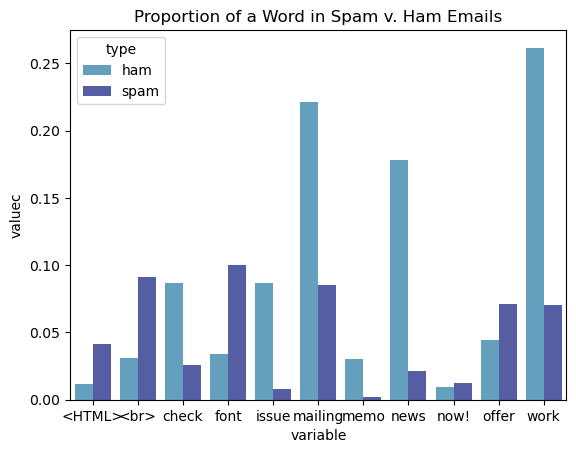

In [189]:
#choosing new words - large proportional differences
    #goal: compare the proportion of spam and ham emails containing a certain word

def word_picker_plot(words, data):
    matches = words_in_texts(words, data["email"])
    
    d = []
    for r in matches: 
        d.append(r)
    d = pd.DataFrame(d)
    d.columns = words
    
    #original data - spam:1, ham:0, adding this type to our df of word matches
    spam_list = data["spam"]
    d["type"] = spam_list

    #replace with actual types
    s_dict = {1: "spam", 0: "ham"}
    d = d.replace({"type": s_dict})

    #Melted to unpivot the dataframe for proportion calculations:
    melted = d.melt("type")
    melted.head()

    percents = melted.groupby(["variable", "type"]).agg({"value":"value_counts"}).rename(columns={"value":"valuec"})
    #calculating proportions
    proportion = percents.groupby(level=0).apply(lambda x: x/float(x.sum())).droplevel(0)
    #proportion of how often the word (variable) shows up in each type of email, reset index for plotting
    prop = proportion.reset_index()

    #plot
    plt.title("Proportion of a Word in Spam v. Ham Emails")
    sns.set_palette("icefire")
    return sns.barplot(data=prop[prop["value"]==1], x="variable", y="valuec", hue="type")


words = ["now!", "memo", "<HTML>", "font", "mailing", "issue", "offer", "<br>", "check", "work", "news"]
word_picker_plot(words, train)

In [194]:
from sklearn.metrics import  mean_squared_error as rmse

def process_pipeline(data, isTest=False, isVal=False):

    #checking specific words in email text
    chosen_words = ["now!", "memo", "<HTML>", "font", "mailing", "issue", "offer", "<br>", "check", "work", "news"]
    #df = pd.DataFrame()
    word_ohe = words_in_texts(chosen_words, data['email'])
    #First DataFrame - just choice words
    df = pd.DataFrame(word_ohe, columns=chosen_words)

    
    #checking if email is reply or forward in subject
    subject_r_or_f = find_replies_sub(data)
    df = pd.concat([df, subject_r_or_f], axis=1)

    return df
    
X_train = process_pipeline(train)
y_train = train["spam"]

#Logistic Regression with LASSO regularization
lr_1 = LogisticRegression(fit_intercept=True, solver='lbfgs')
lr_1.fit(X_train, y_train)

l1_accuracy = (lr_1.predict(X_train) == y_train).mean()
print("Training Accuracy:", l1_accuracy)

training_error = rmse(lr_1.predict(X_train), y_train)
print("Training Error:", training_error)


X_val = process_pipeline(val, isVal=True)
y_val = val["spam"]

#Logistic Regression with LASSO regularization
lr_2 = LogisticRegression(fit_intercept=True, solver='lbfgs')
lr_2.fit(X_val, y_val)

l2_accuracy = (lr_2.predict(X_val) == y_val).mean()
print("Validation Accuracy:", l2_accuracy)

Training Accuracy: 0.8672966857447092
Training Error: 0.13270331425529083
Validation Accuracy: 0.8778443113772455


### Results

#### Training Accuracy: 86.73%

####  Training Error: 13.27%

#### Validation Accuracy: 87.78%


### Methods:

1. Choosing words with large proportional differences observed amongst spam v. ham emails bodies
2. Checking whether email subjects indicate the email was either forwarded or replied

### Additional Implementations to Try:
1. Checking the length of the email text body
2. Checking the usage, and types of usage of punctuation (how many !, ?)
3. Digging into REGEX patterns in the text body, spam emails typically contain: offers, free, watch, etc.


Text(0.5, 1.0, 'ROC Curve')

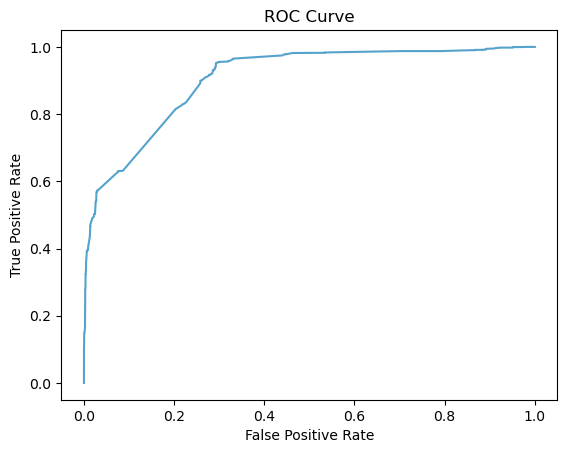

In [191]:
from sklearn.metrics import roc_curve
#fit log_m and predit_proba from y estimates and y_train, apply roc_cruve

roc_model = lr_1
estimates_one = roc_model.predict_proba(X_train)[:, 1]
estimates_one

fprs, tprs, threshholds = roc_curve(y_train.values, estimates_one)

plt.plot(fprs, tprs)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")